# Tyler's Capstone Scratchpad

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import prepare
import explore
import wrangle
import tyler_explore
import tyler_wrangle
from datetime import datetime
import os

In [2]:
# creating a color palette for charts
colors = ['#0D3580', '#1761B0', '#282828', '#181818', '#D2292D', '#AF0C15']

In [3]:
sns.set_palette(sns.color_palette(colors))

In [5]:
df = wrangle.get_survey_data('survey.csv')

In [6]:
strings_df = wrangle.prep_the_strings(df)
encoded_df = wrangle.prep_encode(strings_df)

In [8]:
train, validate, test = explore.three_split(encoded_df, 'work_interfere')

#### `Univariate - Key Findings, Takeaways, and Next Steps`:
- `gender` is very unbalanced, with approx 75% female, 25% male, and less than 1% other.
- `self_employed` is also very unbalanced, with only 10% self-employed.
- `family_history` is 40% no history, 60% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split and at first glance appears to not be a driver.
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-third not receiving any, and one-fifth unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` is normally distributed with 60% having a wellness program, and 20% each either not having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` is roughly normally distributed with 40% receiving help/resources from their company, and 30% not receiving any, and 20% unsure.
- `anonymity` shows most believe they would be able to keep their issues private if they received helped/seeked treatment for a mental issue. Less than 5% felt they could not stay anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` is skewed to the right, with 40% showing no consequences, 30% fearing consequences, and 20% unsure.
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 20% worry about consequences, and 5% are unsure. We are really interested to see what leads to these differences.
- `coworkers` are roughly normally distributed with 60% feeling comfortable speaking with coworkers, and 20% uncomfortable and 20% unsure.
- `supervisor` shows another stark contrast where 30% are uncomortable, 40% comfortable, and 30% unsure.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` is roughly normally distributed, with most (40%) feeling like their employer takes mental health as seriously as physical health. This is really interesting considering the other responses. (If your boss takes mental health as seriously as pysical health, why are you less likely to bring up a mental issue?)
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

- `Next Steps` Definitely want to see if the 'unsure' groups drive 'work_interfere' or if they are just noise. We will also need to look into over/under-sampling methods to normalize our data a little more, potentially.

In [9]:
encoded_df = encoded_df.drop(columns=['country', 'timestamp'])

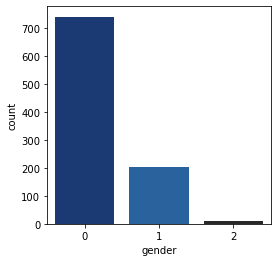

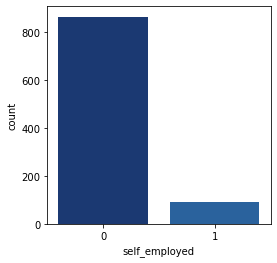

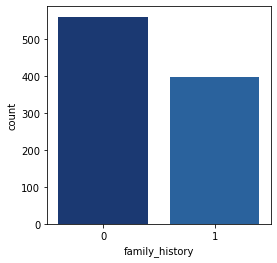

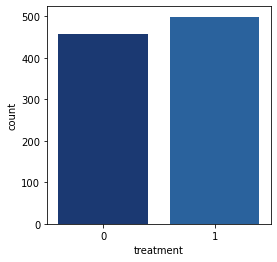

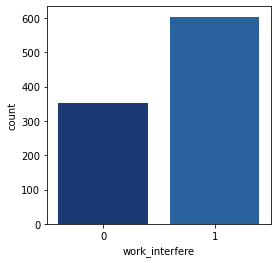

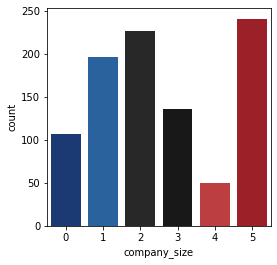

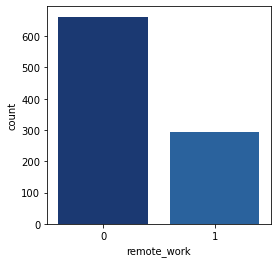

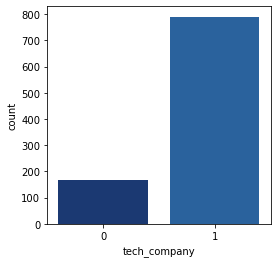

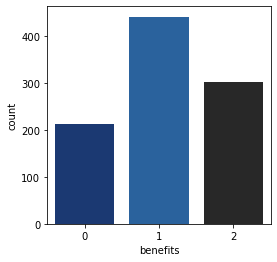

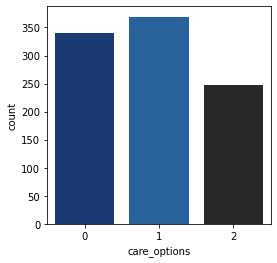

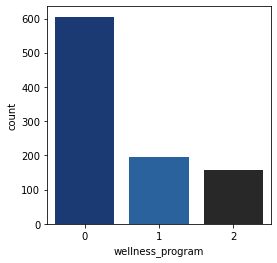

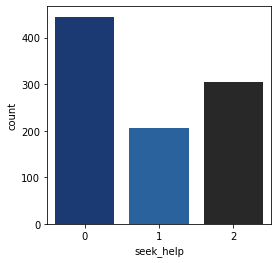

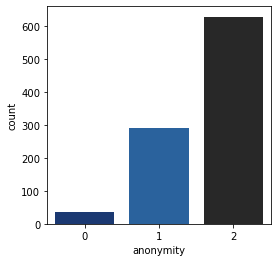

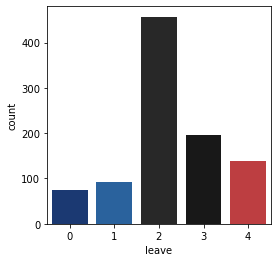

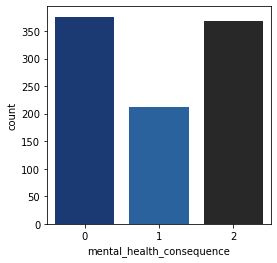

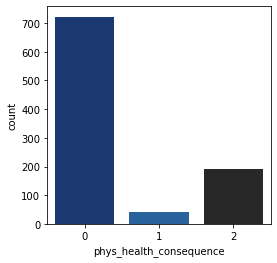

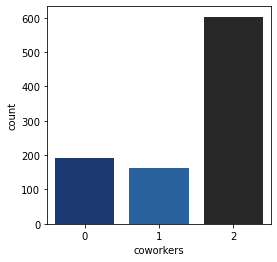

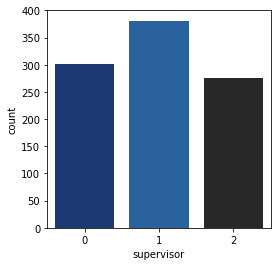

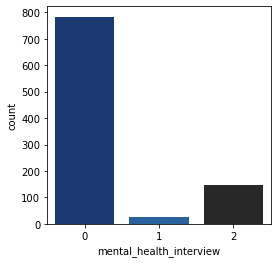

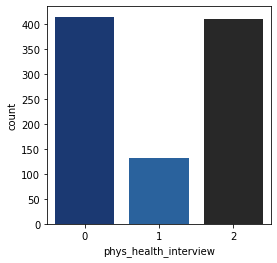

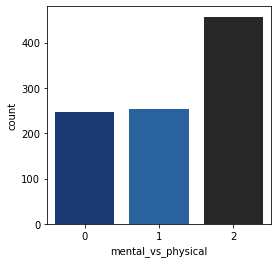

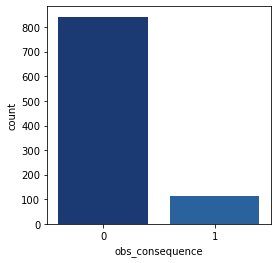

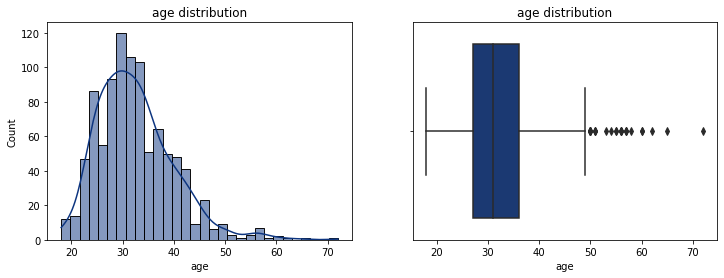

In [10]:
explore.mental_health_univariate(encoded_df)

# Tyler's Univariate to-do list:
1. create 100% horizontal bar charts as subplots on the right for cat_vars
1. 

In [11]:
hot_df = explore.one_hot(encoded_df)
hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          957 non-null    int64
 1   gender                       957 non-null    int64
 2   work_interfere               957 non-null    int64
 3   company_size_0               957 non-null    uint8
 4   company_size_1               957 non-null    uint8
 5   company_size_2               957 non-null    uint8
 6   company_size_3               957 non-null    uint8
 7   company_size_4               957 non-null    uint8
 8   company_size_5               957 non-null    uint8
 9   leave_0                      957 non-null    uint8
 10  leave_1                      957 non-null    uint8
 11  leave_2                      957 non-null    uint8
 12  leave_3                      957 non-null    uint8
 13  leave_4                      957 non-null    uint

In [13]:
hot_train, hot_validate, hot_test = explore.three_split(hot_df, 'work_interfere')

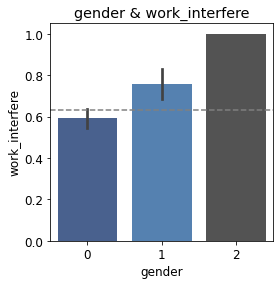


_____________________



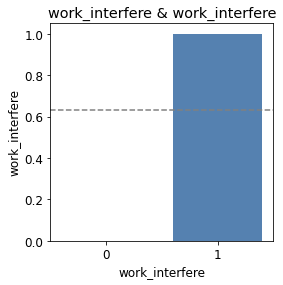


_____________________



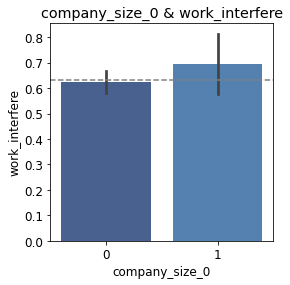


_____________________



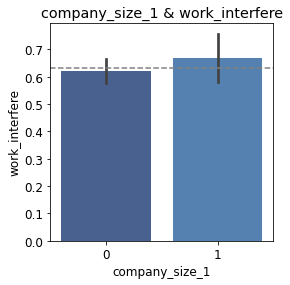


_____________________



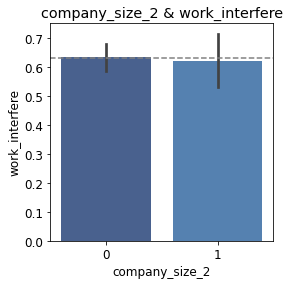


_____________________



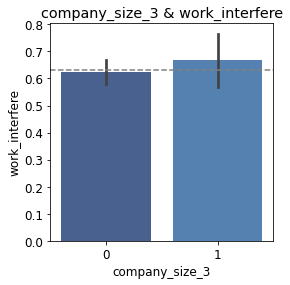


_____________________



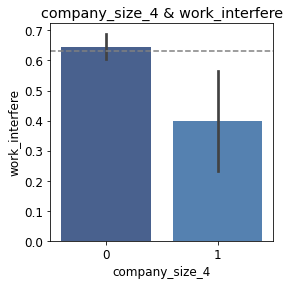


_____________________



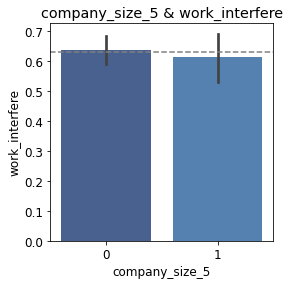


_____________________



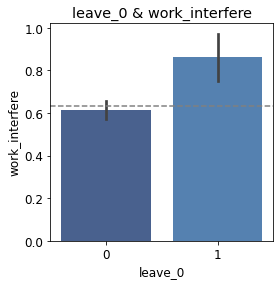


_____________________



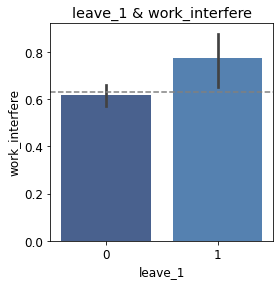


_____________________



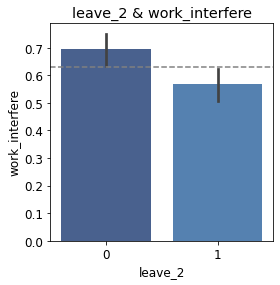


_____________________



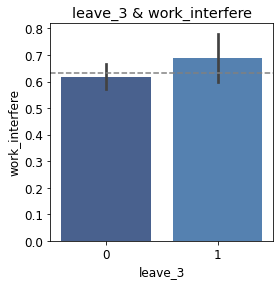


_____________________



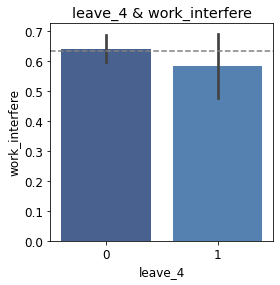


_____________________



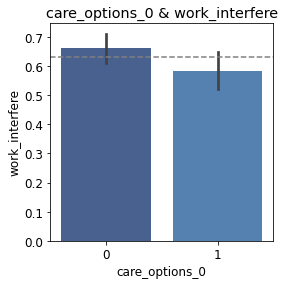


_____________________



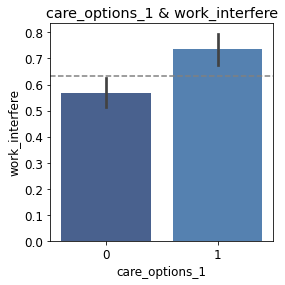


_____________________



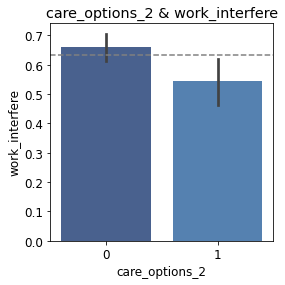


_____________________



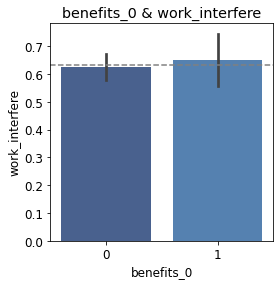


_____________________



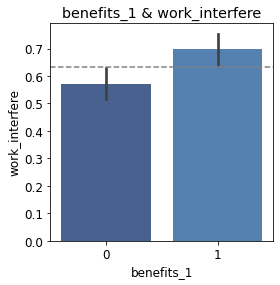


_____________________



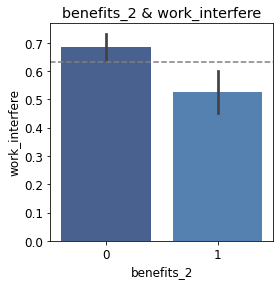


_____________________



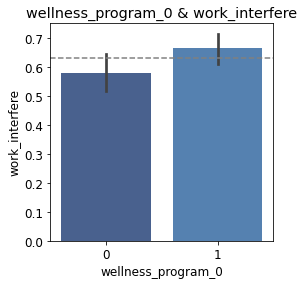


_____________________



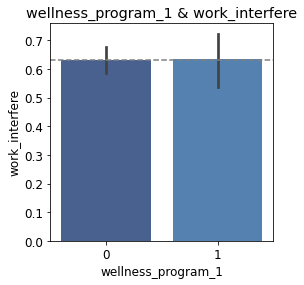


_____________________



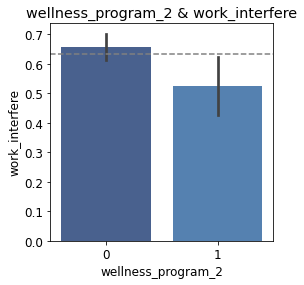


_____________________



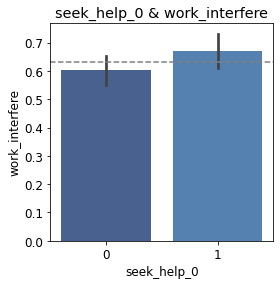


_____________________



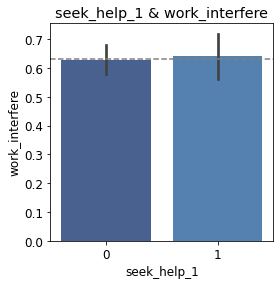


_____________________



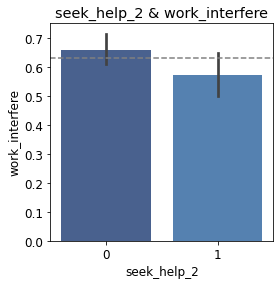


_____________________



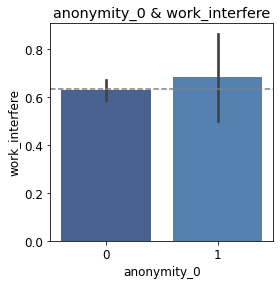


_____________________



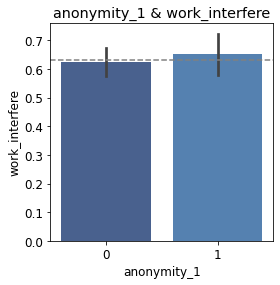


_____________________



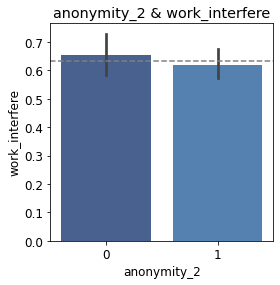


_____________________



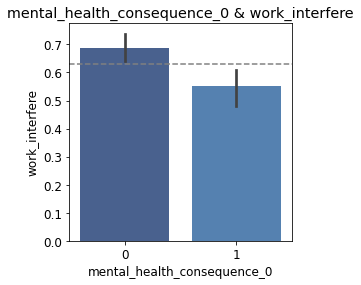


_____________________



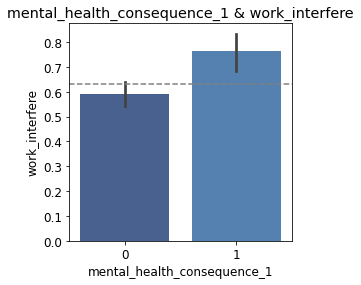


_____________________



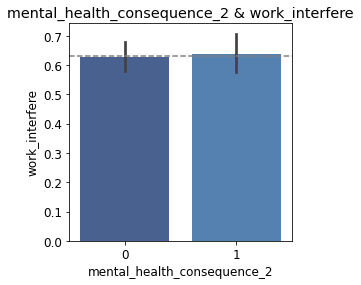


_____________________



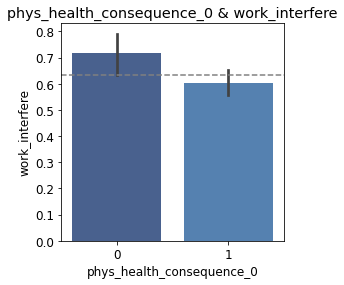


_____________________



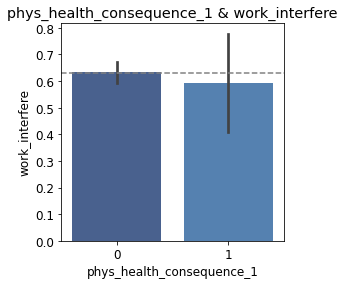


_____________________



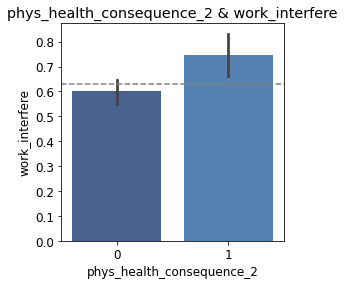


_____________________



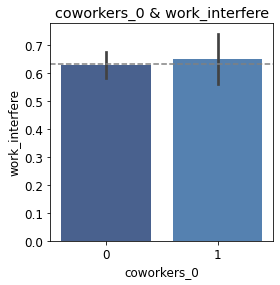


_____________________



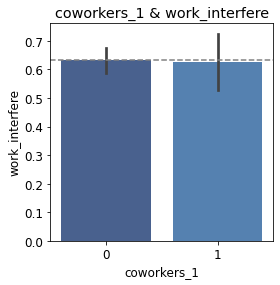


_____________________



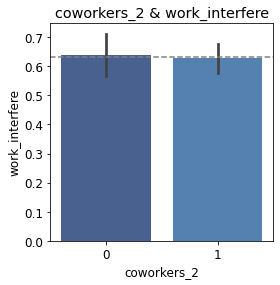


_____________________



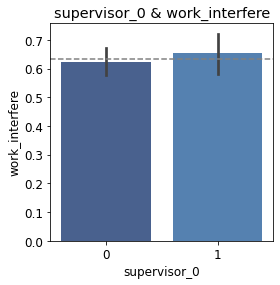


_____________________



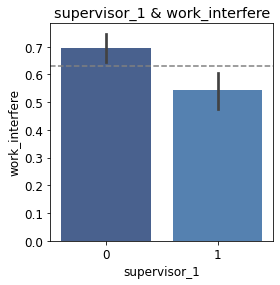


_____________________



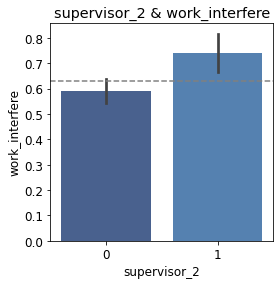


_____________________



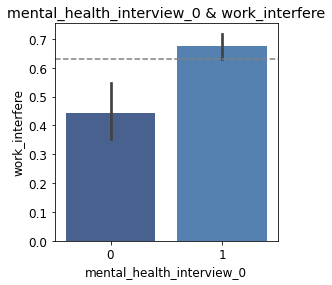


_____________________



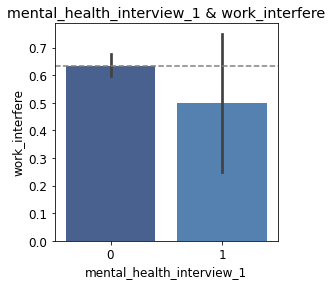


_____________________



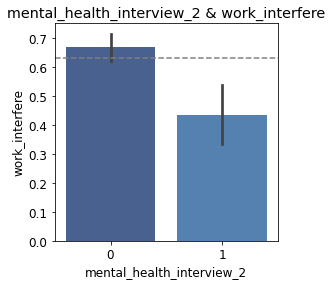


_____________________



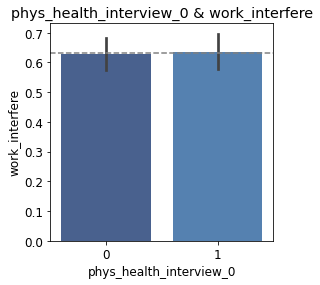


_____________________



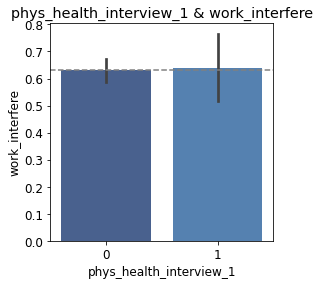


_____________________



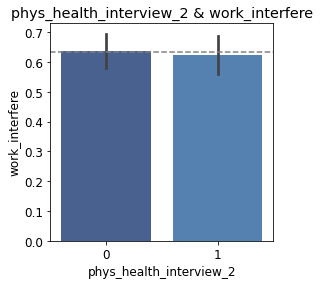


_____________________



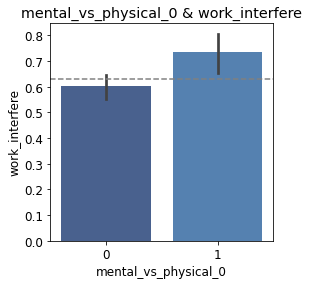


_____________________



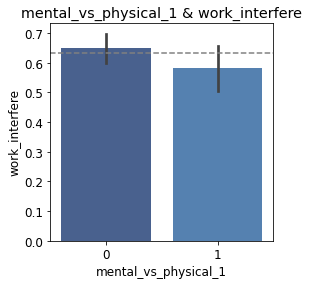


_____________________



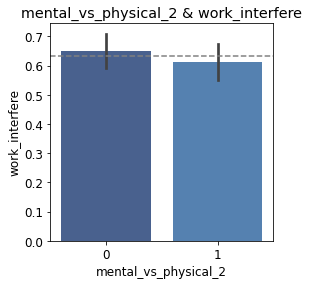


_____________________

age


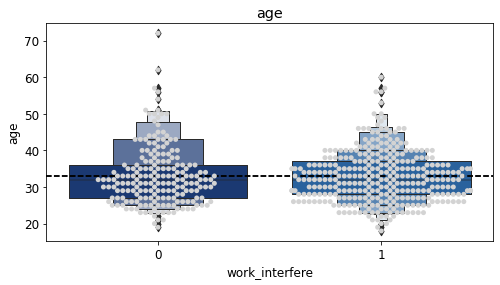

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_0   17.35   0.0000                 1.0
2     mental_health_interview_2   15.99   0.0001                 1.0
3                care_options_1   14.97   0.0001                 1.0
4                  supervisor_1   12.42   0.0004                 1.0
5                    benefits_2   12.19   0.0005                 1.0
6   mental_health_consequence_1   11.28   0.0008                 1.0
7                        gender   13.21   0.0

,variable,chi2,p-value,degrees of freedom
0,work_interfere,530.71,0.0000,1.0
1,mental_health_interview_0,17.35,0.0000,1.0
2,mental_health_interview_2,15.99,0.0001,1.0
3,care_options_1,14.97,0.0001,1.0
4,supervisor_1,12.42,0.0004,1.0
5,benefits_2,12.19,0.0005,1.0
6,mental_health_consequence_1,11.28,0.0008,1.0
7,gender,13.21,0.0014,2.0
8,supervisor_2,9.85,0.0017,1.0
9,mental_health_consequence_0,9.88,0.0017,1.0


In [14]:
explore.mental_health_bivariate(hot_train, 'work_interfere')

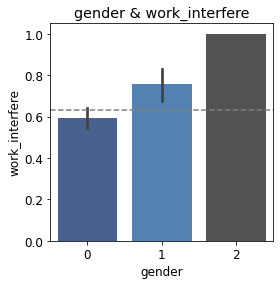


_____________________



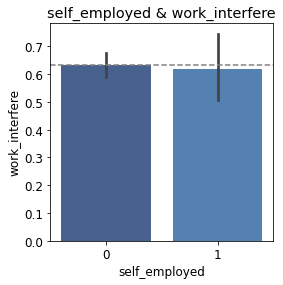


_____________________



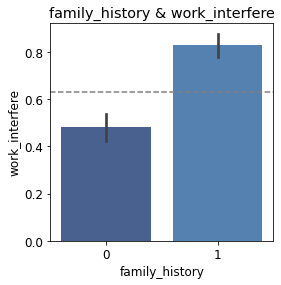


_____________________



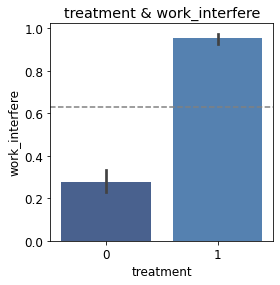


_____________________



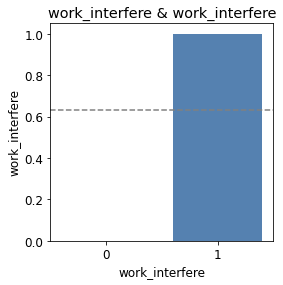


_____________________



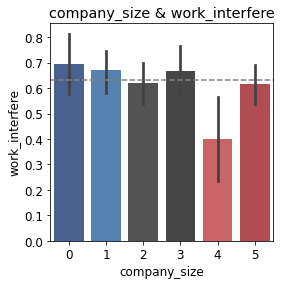


_____________________



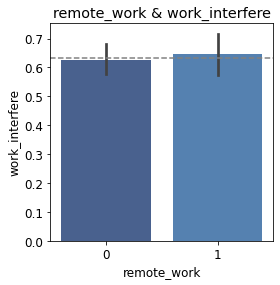


_____________________



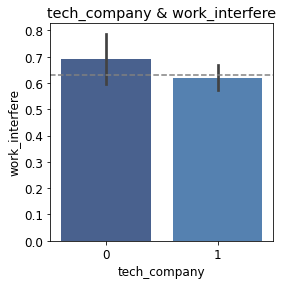


_____________________



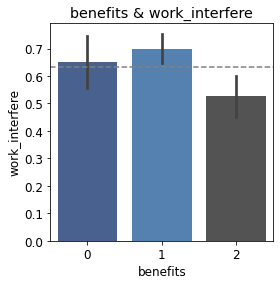


_____________________



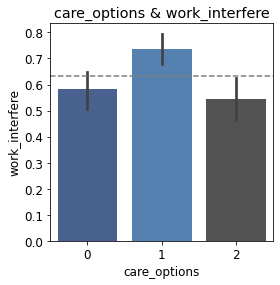


_____________________



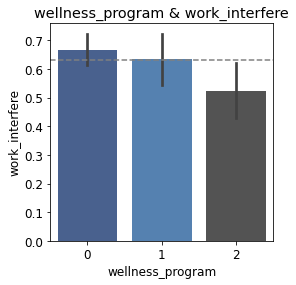


_____________________



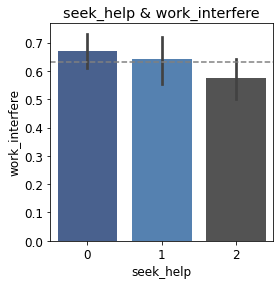


_____________________



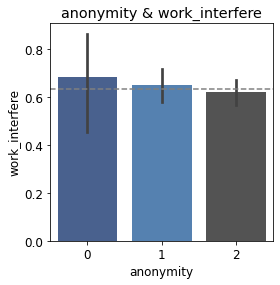


_____________________



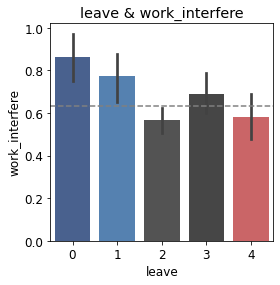


_____________________



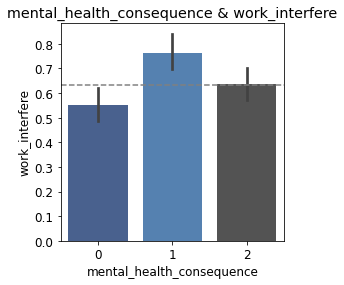


_____________________



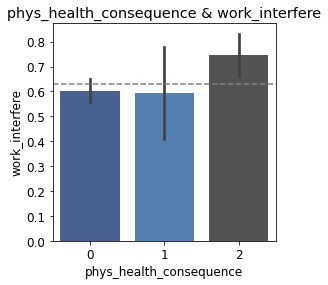


_____________________



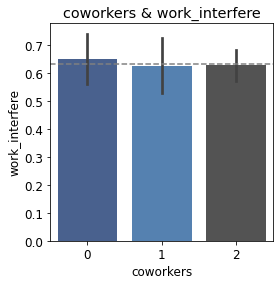


_____________________



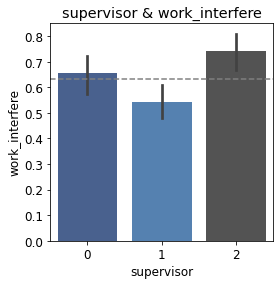


_____________________



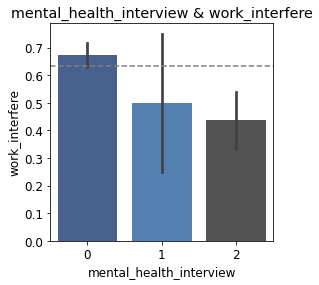


_____________________



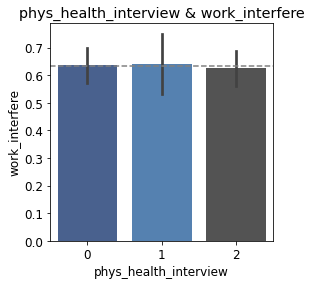


_____________________



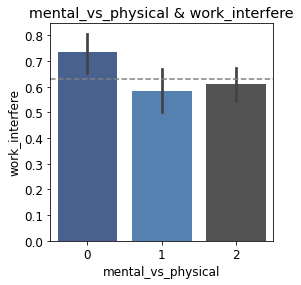


_____________________



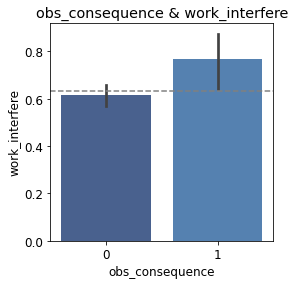


_____________________

age


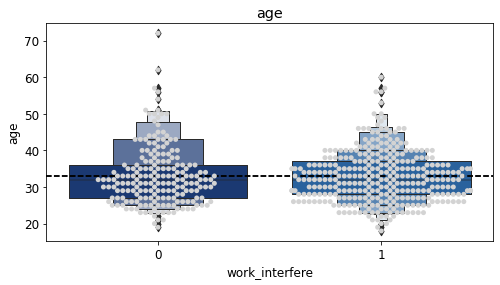

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

,variable,chi2,p-value,degrees of freedom
0,family_history,65.94,0.0000,1.0
1,treatment,258.60,0.0000,1.0
2,work_interfere,530.71,0.0000,1.0
3,mental_health_interview,18.51,0.0001,2.0
4,care_options,16.16,0.0003,2.0
5,supervisor,15.60,0.0004,2.0
6,mental_health_consequence,15.41,0.0005,2.0
7,leave,19.49,0.0006,4.0
8,benefits,13.58,0.0011,2.0
9,gender,13.21,0.0014,2.0


In [15]:
explore.mental_health_bivariate(train, 'work_interfere')

## Data Exploration

### Boolean Variables:
- 'self_employed'
- 'family_history'
- 'remote_work'
- 'tech_company'
- 'obs_consequence'

#### Univariate Exploration - Key Findings, Takeaways, and Next Steps:
- `gender` is very unbalanced, with approx 75% female, 25% male, and less than 1% other.
- `self_employed` is also very unbalanced, with only 10% self-employed.
- `family_history` is 40% no history, 60% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split and at first glance appears to not be a driver.
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-third not receiving any, and one-fifth unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` is normally distributed with 60% having a wellness program, and 20% each either not having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` is roughly normally distributed with 40% receiving help/resources from their company, and 30% not receiving any, and 20% unsure.
- `anonymity` shows most believe they would be able to keep their issues private if they received helped/seeked treatment for a mental issue. Less than 5% felt they could not stay anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` is skewed to the right, with 40% showing no consequences, 30% fearing consequences, and 20% unsure.
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 20% worry about consequences, and 5% are unsure. We are really interested to see what leads to these differences.
- `coworkers` are roughly normally distributed with 60% feeling comfortable speaking with coworkers, and 20% uncomfortable and 20% unsure.
- `supervisor` shows another stark contrast where 30% are uncomortable, 40% comfortable, and 30% unsure.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` is roughly normally distributed, with most (40%) feeling like their employer takes mental health as seriously as physical health. This is really interesting considering the other responses. (If your boss takes mental health as seriously as pysical health, why are you less likely to bring up a mental issue?)
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

- `Next Steps` Definitely want to see if the 'unsure' groups drive 'work_interfere' or if they are just noise. We will also need to look into over/under-sampling methods to normalize our data a little more, potentially.

#### Bivariate Exploration

In [ ]:
mets = tyler_explore.explore_bivariate(train, 'work_interfere')

In [ ]:
hot_df = tyler_explore.one_hot(encoded_df)

In [ ]:
hot_df.info()

In [ ]:
tyler_df = encoded_df[['work_interfere', 'company_size', 'leave', 'care_options', 'benefits', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']]

In [ ]:
tyler_dummies = pd.get_dummies(data=tyler_df, columns = ['company_size', 'leave', 'care_options', 'benefits', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical'])

In [ ]:
tyler_explore.explore_bivariate_2nd(tyler_dummies, 'work_interfere', cat_vars=list(tyler_dummies.columns))

In [ ]:
tyler_dummies.head(1).T

In [ ]:
# data frame of categorical variables, with chi2 summary
mets

In [ ]:
# only returning those with 'p-value' < alpha
low_p = mets[mets['p-value']<0.05]
low_p

In [ ]:
# reordering based on chi2 score
top_drivers = low_p.sort_values('chi2', ascending=False)
top_drivers

In [ ]:
# let's look at what needs to be one-hot encoded
variables = list(top_drivers['variable'])
for var in variables:
    print(train[var].value_counts())

#### Bivariate Exploration - Key Findings, Takeaways, and Next Steps:
**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Worth Exploring Further**
- company size

### Looking into Company Size 4:

In [ ]:
train4 = train[train['company_size']==4]

In [ ]:
tyler_explore.explore_bivariate(train4, 'work_interfere')

In [ ]:
# list of the potential top drivers
made_the_cut = list(top_drivers['variable'][top_drivers['chi2']>10])

In [ ]:
# new dataframe to use for multivariate exploration
to_multi = train[made_the_cut]

In [ ]:
# quick peak...
to_multi = to_multi + train['age']